<a href="https://colab.research.google.com/github/kridtapon/Next-Bar-Engulfing-Winrate/blob/main/Engulfing_Winrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [ ]:
data = yf.download("GC=F", period="5y")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2019-11-20 00:00:00+00:00,1473.300049,1473.300049,1474.500000,1467.300049,1472.599976,31
2019-11-21 00:00:00+00:00,1463.099976,1463.099976,1463.099976,1463.099976,1463.099976,16
2019-11-22 00:00:00+00:00,1463.099976,1463.099976,1468.599976,1463.099976,1468.599976,19
2019-11-25 00:00:00+00:00,1456.599976,1456.599976,1457.099976,1455.500000,1457.099976,14
2019-11-26 00:00:00+00:00,1459.800049,1459.800049,1459.800049,1459.800049,1459.800049,346362
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,2568.199951,2568.199951,2576.199951,2554.199951,2555.100098,27
2024-11-15 00:00:00+00:00,2565.699951,2565.699951,2565.699951,2565.699951,2565.699951,20


In [ ]:
df = data.copy()

In [ ]:
#df = df.dropna()

df = df.ffill()

In [ ]:
df.columns = ['Date','Close','High','Low','Open','Volume']

In [ ]:
df

,Date,Close,High,Low,Open,Volume
Date,,,,,,
2019-11-20 00:00:00+00:00,1473.300049,1473.300049,1474.500000,1467.300049,1472.599976,31
2019-11-21 00:00:00+00:00,1463.099976,1463.099976,1463.099976,1463.099976,1463.099976,16
2019-11-22 00:00:00+00:00,1463.099976,1463.099976,1468.599976,1463.099976,1468.599976,19
2019-11-25 00:00:00+00:00,1456.599976,1456.599976,1457.099976,1455.500000,1457.099976,14
2019-11-26 00:00:00+00:00,1459.800049,1459.800049,1459.800049,1459.800049,1459.800049,346362
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,2568.199951,2568.199951,2576.199951,2554.199951,2555.100098,27
2024-11-15 00:00:00+00:00,2565.699951,2565.699951,2565.699951,2565.699951,2565.699951,20
2024-11-18 00:00:00+00:00,2610.600098,2610.600098,2610.699951,2589.399902,2591.699951,136


In [ ]:
df.drop(['Date'], axis='columns', inplace=True)

In [ ]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2019-11-20 00:00:00+00:00,1473.300049,1474.500000,1467.300049,1472.599976,31
2019-11-21 00:00:00+00:00,1463.099976,1463.099976,1463.099976,1463.099976,16
2019-11-22 00:00:00+00:00,1463.099976,1468.599976,1463.099976,1468.599976,19
2019-11-25 00:00:00+00:00,1456.599976,1457.099976,1455.500000,1457.099976,14
2019-11-26 00:00:00+00:00,1459.800049,1459.800049,1459.800049,1459.800049,346362
...,...,...,...,...,...
2024-11-14 00:00:00+00:00,2568.199951,2576.199951,2554.199951,2555.100098,27
2024-11-15 00:00:00+00:00,2565.699951,2565.699951,2565.699951,2565.699951,20
2024-11-18 00:00:00+00:00,2610.600098,2610.699951,2589.399902,2591.699951,136


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


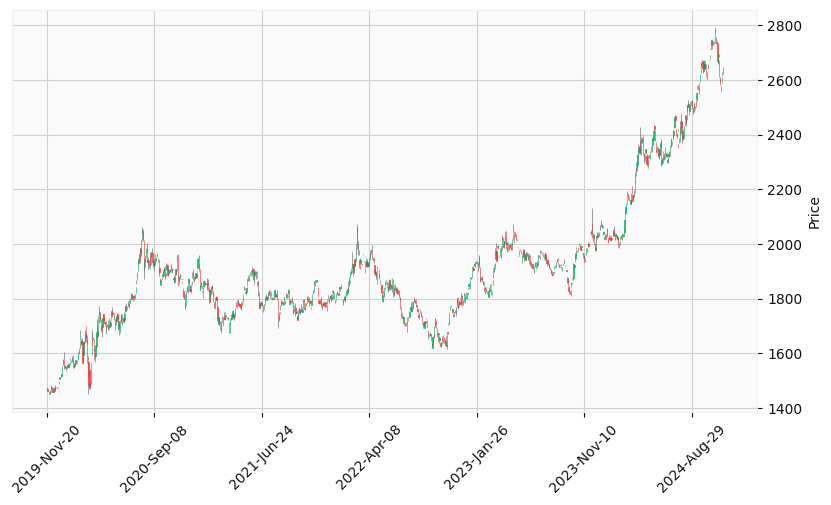

In [ ]:
mpf.plot(df, style='yahoo',type='candle',figratio=(18,10))

In [ ]:
def Trading_Condition(df):
    # Identify basic candle types
    df['Bullish Candle'] = df['Close'] > df['Open']
    df['Bearish Candle'] = df['Close'] < df['Open']
    df['Prev Bullish Candle'] = df['Close'].shift(1) > df['Open'].shift(1)
    df['Prev Bearish Candle'] = df['Close'].shift(1) < df['Open'].shift(1)
    df['Prev 2 Bullish Candle'] = df['Close'].shift(2) > df['Open'].shift(2)
    df['Prev 2 Bearish Candle'] = df['Close'].shift(2) < df['Open'].shift(2)

    # Bullish conditions
    df['Prev Bearish Low < Bullish Low'] = df['Low'].shift(2) < df['Low'].shift(1)
    df['Prev Bearish Open < Bullish Close'] = df['Open'].shift(2) < df['Close'].shift(1)

    # Bearish conditions
    df['Prev Bullish High > Bearish High'] = df['High'].shift(2) > df['High'].shift(1)
    df['Prev Bullish Open > Bearish Close'] = df['Open'].shift(2) > df['Close'].shift(1)

    # Identify the Bullish
    df['Bullish Engulfing'] = (df['Prev Bearish Low < Bullish Low'] &
                               df['Prev Bearish Open < Bullish Close'] &
                               df['Prev 2 Bearish Candle'] &
                               df['Prev Bullish Candle'])

    # Identify the Bearish
    df['Bearish Engulfing'] = (df['Prev Bullish High > Bearish High'] &
                               df['Prev Bullish Open > Bearish Close'] &
                               df['Prev 2 Bullish Candle'] &
                               df['Prev Bearish Candle'])

    df['Bullish Engulfing Profit'] = (df['Bullish Engulfing'] &
                                      df['Bullish Candle'])

    df['Bearish Engulfing Profit'] = (df['Bearish Engulfing'] &
                                      df['Bearish Candle'])
    return df

In [ ]:
# Apply the function
df_C = Trading_Condition(df)

In [ ]:
df_C

,Close,High,Low,Open,Volume,Bullish Candle,Bearish Candle,Prev Bullish Candle,Prev Bearish Candle,Prev 2 Bullish Candle,Prev 2 Bearish Candle,Prev Bearish Low < Bullish Low,Prev Bearish Open < Bullish Close,Prev Bullish High > Bearish High,Prev Bullish Open > Bearish Close,Bullish Engulfing,Bearish Engulfing,Bullish Engulfing Profit,Bearish Engulfing Profit
Date,,,,,,,,,,,,,,,,,,,
2019-11-20 00:00:00+00:00,1473.300049,1474.500000,1467.300049,1472.599976,31,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-11-21 00:00:00+00:00,1463.099976,1463.099976,1463.099976,1463.099976,16,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2019-11-22 00:00:00+00:00,1463.099976,1468.599976,1463.099976,1468.599976,19,False,True,False,False,True,False,False,False,True,True,False,False,False,False
2019-11-25 00:00:00+00:00,1456.599976,1457.099976,1455.500000,1457.099976,14,False,True,False,True,False,False,False,False,False,False,False,False,False,False
2019-11-26 00:00:00+00:00,1459.800049,1459.800049,1459.800049,1459.800049,346362,False,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,2568.199951,2576.199951,2554.199951,2555.100098,27,True,False,False,True,False,True,False,False,False,True,False,False,False,False
2024-11-15 00:00:00+00:00,2565.699951,2565.699951,2565.699951,2565.699951,20,False,False,True,False,False,True,False,False,True,True,False,False,False,False
2024-11-18 00:00:00+00:00,2610.600098,2610.699951,2589.399902,2591.699951,136,True,False,False,False,True,False,True,True,True,False,False,False,False,False


In [ ]:
Data_B = df_C['Bullish Engulfing']

In [ ]:
df_C['Bullish Engulfing'].tail(50)

,Bullish Engulfing
Date,
2024-09-12 00:00:00+00:00,False
2024-09-13 00:00:00+00:00,True
2024-09-16 00:00:00+00:00,False
2024-09-17 00:00:00+00:00,False
2024-09-18 00:00:00+00:00,False
2024-09-19 00:00:00+00:00,False
2024-09-20 00:00:00+00:00,False
2024-09-23 00:00:00+00:00,False
2024-09-24 00:00:00+00:00,False


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


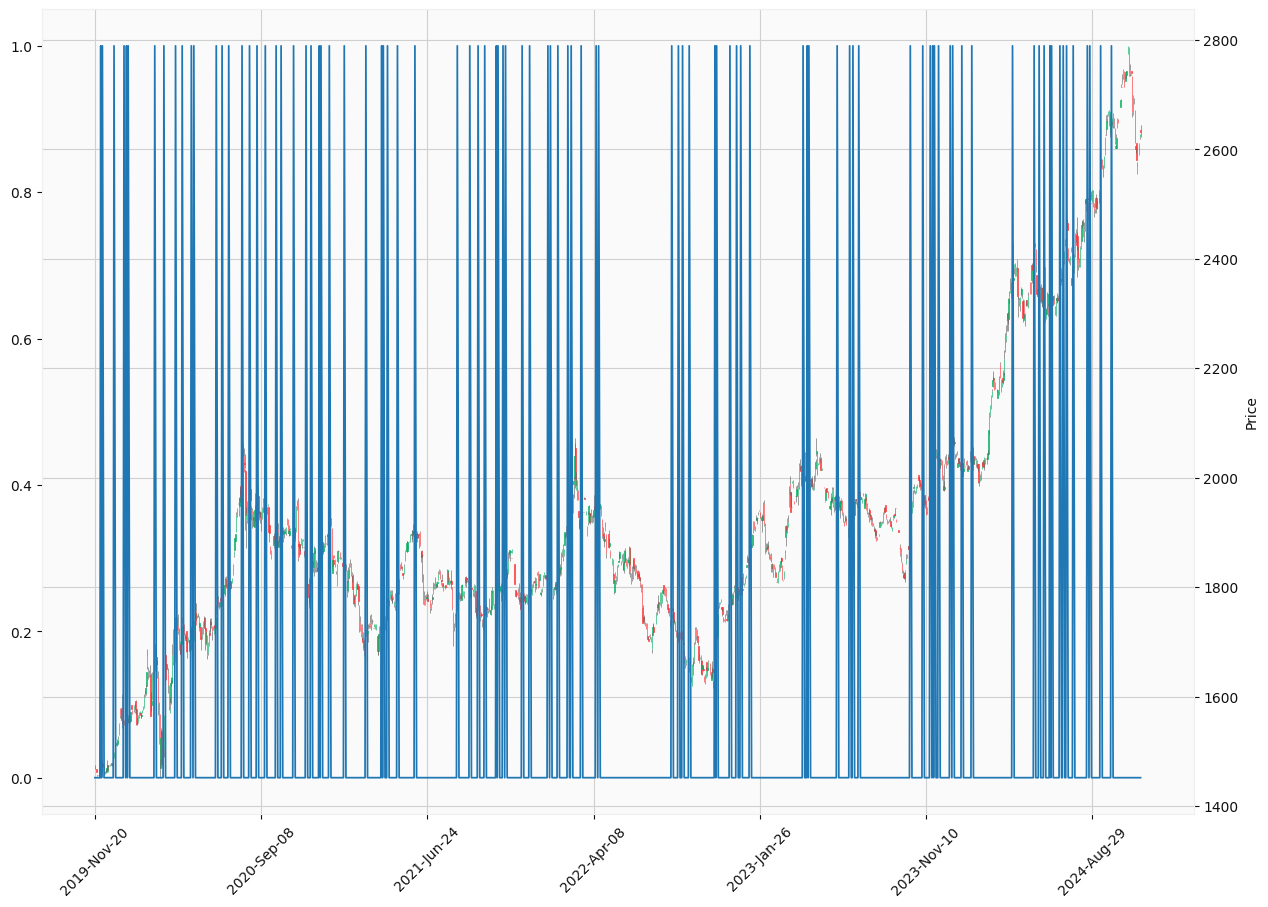

In [ ]:
#apd = mpf.make_addplot(Data_T,type='scatter',markersize=10,marker='^')
apd = mpf.make_addplot(Data_B,markersize=50,marker='^')

mpf.plot(df, addplot=apd, style='yahoo',type='candle',figscale=2)

In [ ]:
df_C['Bullish Engulfing'].value_counts()

,count
Bullish Engulfing,
False,1166
True,93


In [ ]:
df['Bullish Engulfing Profit'].value_counts()

,count
Bullish Engulfing Profit,
False,1215
True,44


In [ ]:
Data_S = df_C['Bearish Engulfing']

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


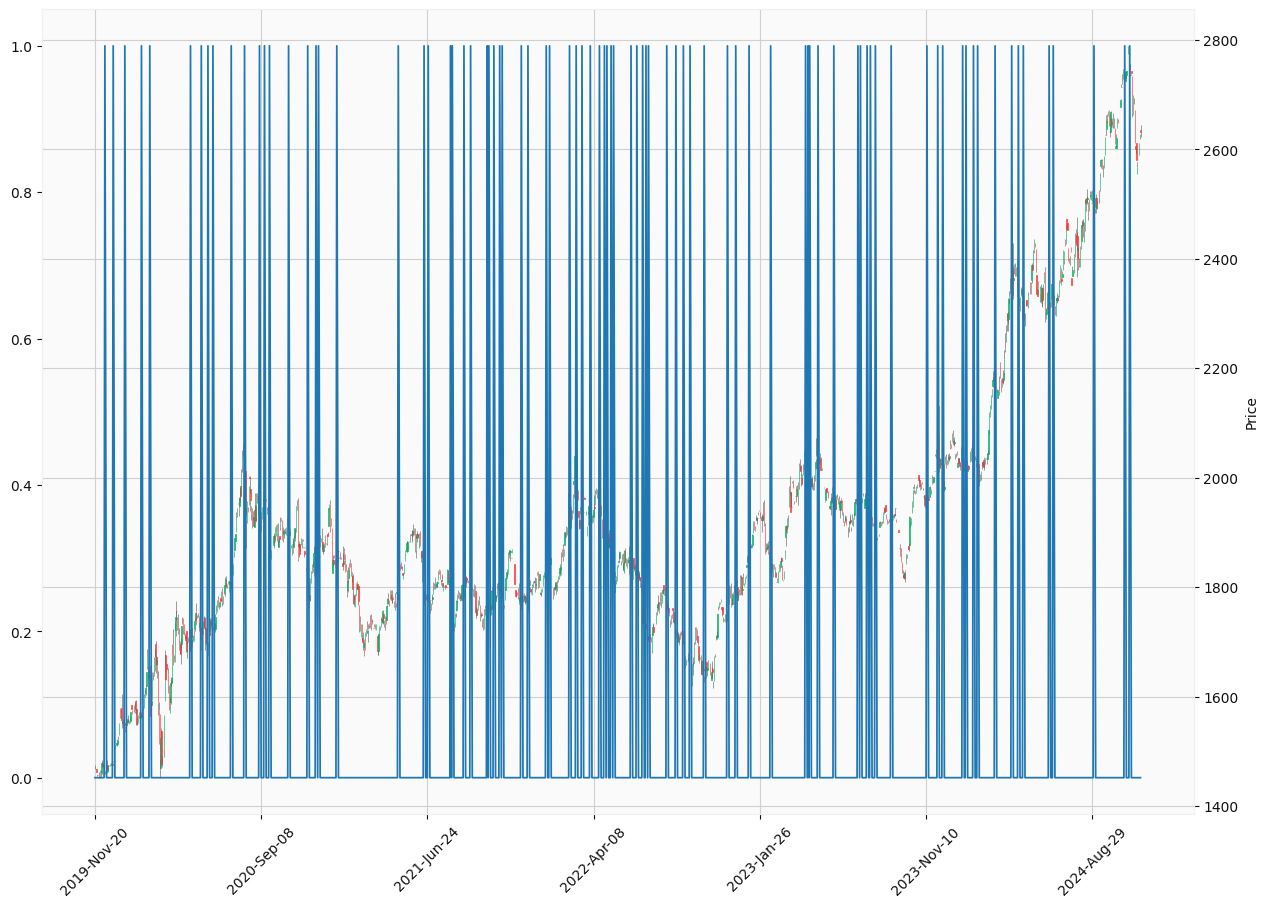

In [ ]:
#apd = mpf.make_addplot(Data_T,type='scatter',markersize=10,marker='^')
apd = mpf.make_addplot(Data_S,markersize=50,marker='^')

mpf.plot(df, addplot=apd, style='yahoo',type='candle',figscale=2)

In [ ]:
df_C['Bearish Engulfing'].value_counts()

,count
Bearish Engulfing,
False,1174
True,85


In [ ]:
df['Bearish Engulfing Profit'].value_counts()

,count
Bearish Engulfing Profit,
False,1225
True,34
